## Plot the landscape under current conditions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import random

# ODE OUTPUTS

## How many passed filters ODE? 

In [10]:
import random
# open the file
ode_df = pd.read_csv('eem_accepted_runs.csv').drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

max = ode_df["passed_filters"].max()
min = ode_df["passed_filters"].min()

print("min:", min/32)
print("max:", max/32)

# find ID of best ps 
best_ps_id = ode_df.loc[ode_df['passed_filters'] == max, 'ID'].unique()
# randomly pick one (if more than one)
best_ps_id = random.choice(best_ps_id)
best_ps_id = int(best_ps_id)
print("best_ps_id:", best_ps_id)

FileNotFoundError: [Errno 2] No such file or directory: 'eem_accepted_runs.csv'

## Save the best ODE PS

In [10]:
# save the best parameter set
ode_ps = pd.read_csv('eem_accepted_parameters.csv').drop(['Unnamed: 0'], axis=1)
ode_best_ps = ode_ps.loc[ode_ps['ID'] == best_ps_id]
# save to csv 
ode_best_ps.to_csv("ode_best_ps.csv")

## Histograms and corr matrix

In [671]:
accepted_parameters = pd.read_csv('eem_accepted_parameters.csv').drop(['Unnamed: 0'], axis=1)

In [676]:
species = ['exmoorPony','fallowDeer','grasslandParkland','longhornCattle','redDeer','roeDeer','tamworthPig','thornyScrub','woodland']

In [680]:
# reshape for correlation matrix
parameters = accepted_parameters.loc[accepted_parameters['growth'].notnull(), ['growth']]
parameters = pd.DataFrame(parameters.values.reshape(100, len(species)), columns = species)
growth_rates = parameters.loc[:,["grasslandParkland", "thornyScrub", "woodland"]]

In [681]:
# look at interaction matrices
interaction_strength_3 = accepted_parameters.drop(['X0', 'growth', 'ID', 'accepted?'], axis=1).dropna()
interaction_strength_3 = interaction_strength_3.set_index(list(interaction_strength_3)[0])
# reshape int matrix
exmoorInts = interaction_strength_3[interaction_strength_3.index=='exmoorPony']
exmoorInts.columns = ['pony_pony', 'pony_fallow','pony_grass','pony_cattle','pony_red','pony_roe','pony_pig','pony_scrub','pony_wood']
exmoorInts = exmoorInts.reset_index(drop=True)
fallowInts = interaction_strength_3[interaction_strength_3.index=='fallowDeer']
fallowInts.columns = ['fallow_pony', 'fallow_fallow', 'fallow_grass','fallow_cattle','fallow_red', 'fallow_roe', 'fallow_pig', 'fallow_scrub', 'fallow_wood']
fallowInts = fallowInts.reset_index(drop=True)
arableInts = interaction_strength_3[interaction_strength_3.index=='grasslandParkland']
arableInts.columns = ['grass_pony', 'grass_fallow', 'grass_grass','grass_cattle','grass_red', 'grass_roe', 'grass_pig', 'grass_scrub', 'grass_wood']
arableInts = arableInts.reset_index(drop=True)
longhornInts = interaction_strength_3[interaction_strength_3.index=='longhornCattle']
longhornInts.columns = ['cattle_pony', 'cattle_fallow', 'cattle_grass','cattle_cattle','cattle_red', 'cattle_roe', 'cattle_pig', 'cattle_scrub', 'cattle_wood']
longhornInts = longhornInts.reset_index(drop=True)
redDeerInts = interaction_strength_3[interaction_strength_3.index=='redDeer']
redDeerInts.columns = ['red_pony', 'red_fallow', 'red_grass','red_cattle','red_red', 'red_roe', 'red_pig', 'red_scrub', 'red_wood']
redDeerInts = redDeerInts.reset_index(drop=True)
roeDeerInts = interaction_strength_3[interaction_strength_3.index=='roeDeer']
roeDeerInts.columns = ['roe_pony', 'roe_fallow', 'roe_grass','roe_cattle','roe_red', 'roe_roe', 'roe_pig', 'roe_scrub', 'roe_wood']
roeDeerInts = roeDeerInts.reset_index(drop=True)
tamworthPigInts = interaction_strength_3[interaction_strength_3.index=='tamworthPig']
tamworthPigInts.columns = ['pig_pony', 'pig_fallow', 'pig_grass','pig_cattle','pig_red', 'pig_roe', 'pig_pig', 'pig_scrub', 'pig_wood']
tamworthPigInts = tamworthPigInts.reset_index(drop=True)
thornyScrubInts = interaction_strength_3[interaction_strength_3.index=='thornyScrub']
thornyScrubInts.columns = ['scrub_pony', 'scrub_fallow', 'scrub_grass','scrub_cattle','scrub_red', 'scrub_roe', 'scrub_pig', 'scrub_scrub', 'scrub_wood']
thornyScrubInts = thornyScrubInts.reset_index(drop=True)
woodlandInts = interaction_strength_3[interaction_strength_3.index=='woodland']
woodlandInts.columns = ['wood_pony', 'wood_fallow', 'wood_grass','wood_cattle','wood_red', 'wood_roe', 'wood_pig', 'wood_scrub', 'wood_wood']
woodlandInts = woodlandInts.reset_index(drop=True)
combined = pd.concat([growth_rates, exmoorInts, fallowInts, arableInts, longhornInts, redDeerInts, roeDeerInts, tamworthPigInts, thornyScrubInts, woodlandInts], axis=1)
parameters = combined.loc[:, (combined != 0).any(axis=0)]
correlationMatrix = combined.corr()

/var/folders/w0/r8c1rzh10_l18y1d53q2_vqm0000gn/T/ipykernel_31194/4167349421.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


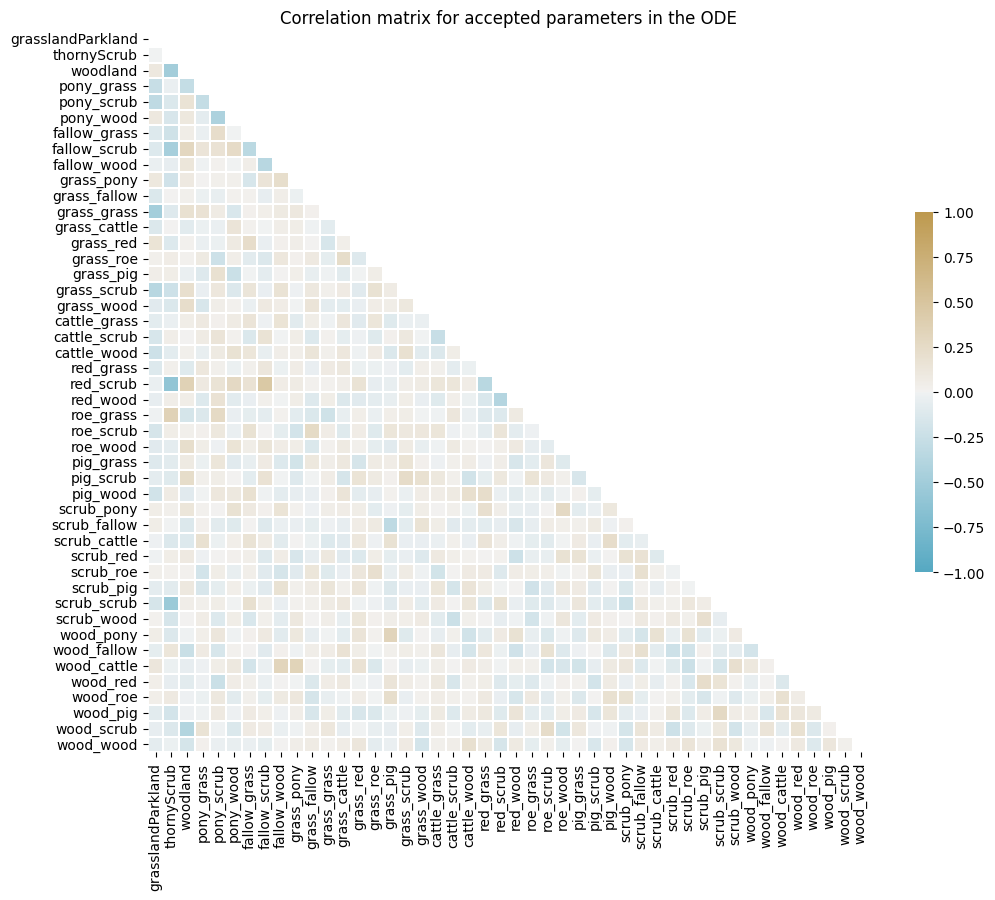

In [683]:
# corr matrix
corr = parameters.corr()
# mask the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# graph it 
f, ax = plt.subplots(figsize=(11, 9))
cmap =sns.diverging_palette(220, 60, l=65, center="light", as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(
    corr,          # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=False,    # Should the values be plotted in the cells?
    vmax=1,       # The maximum value of the legend. All higher vals will be same color
    vmin=-1,      # The minimum value of the legend. All lower vals will be same color
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=0.1, # Width of lines that divide cells
    cbar_kws={"shrink": .5},  # Extra kwargs for the legend; in this case, shrink by 50%
)
heatmap.set_title("Correlation matrix for accepted parameters in the ODE")
heatmap.figure.tight_layout()
plt.show()

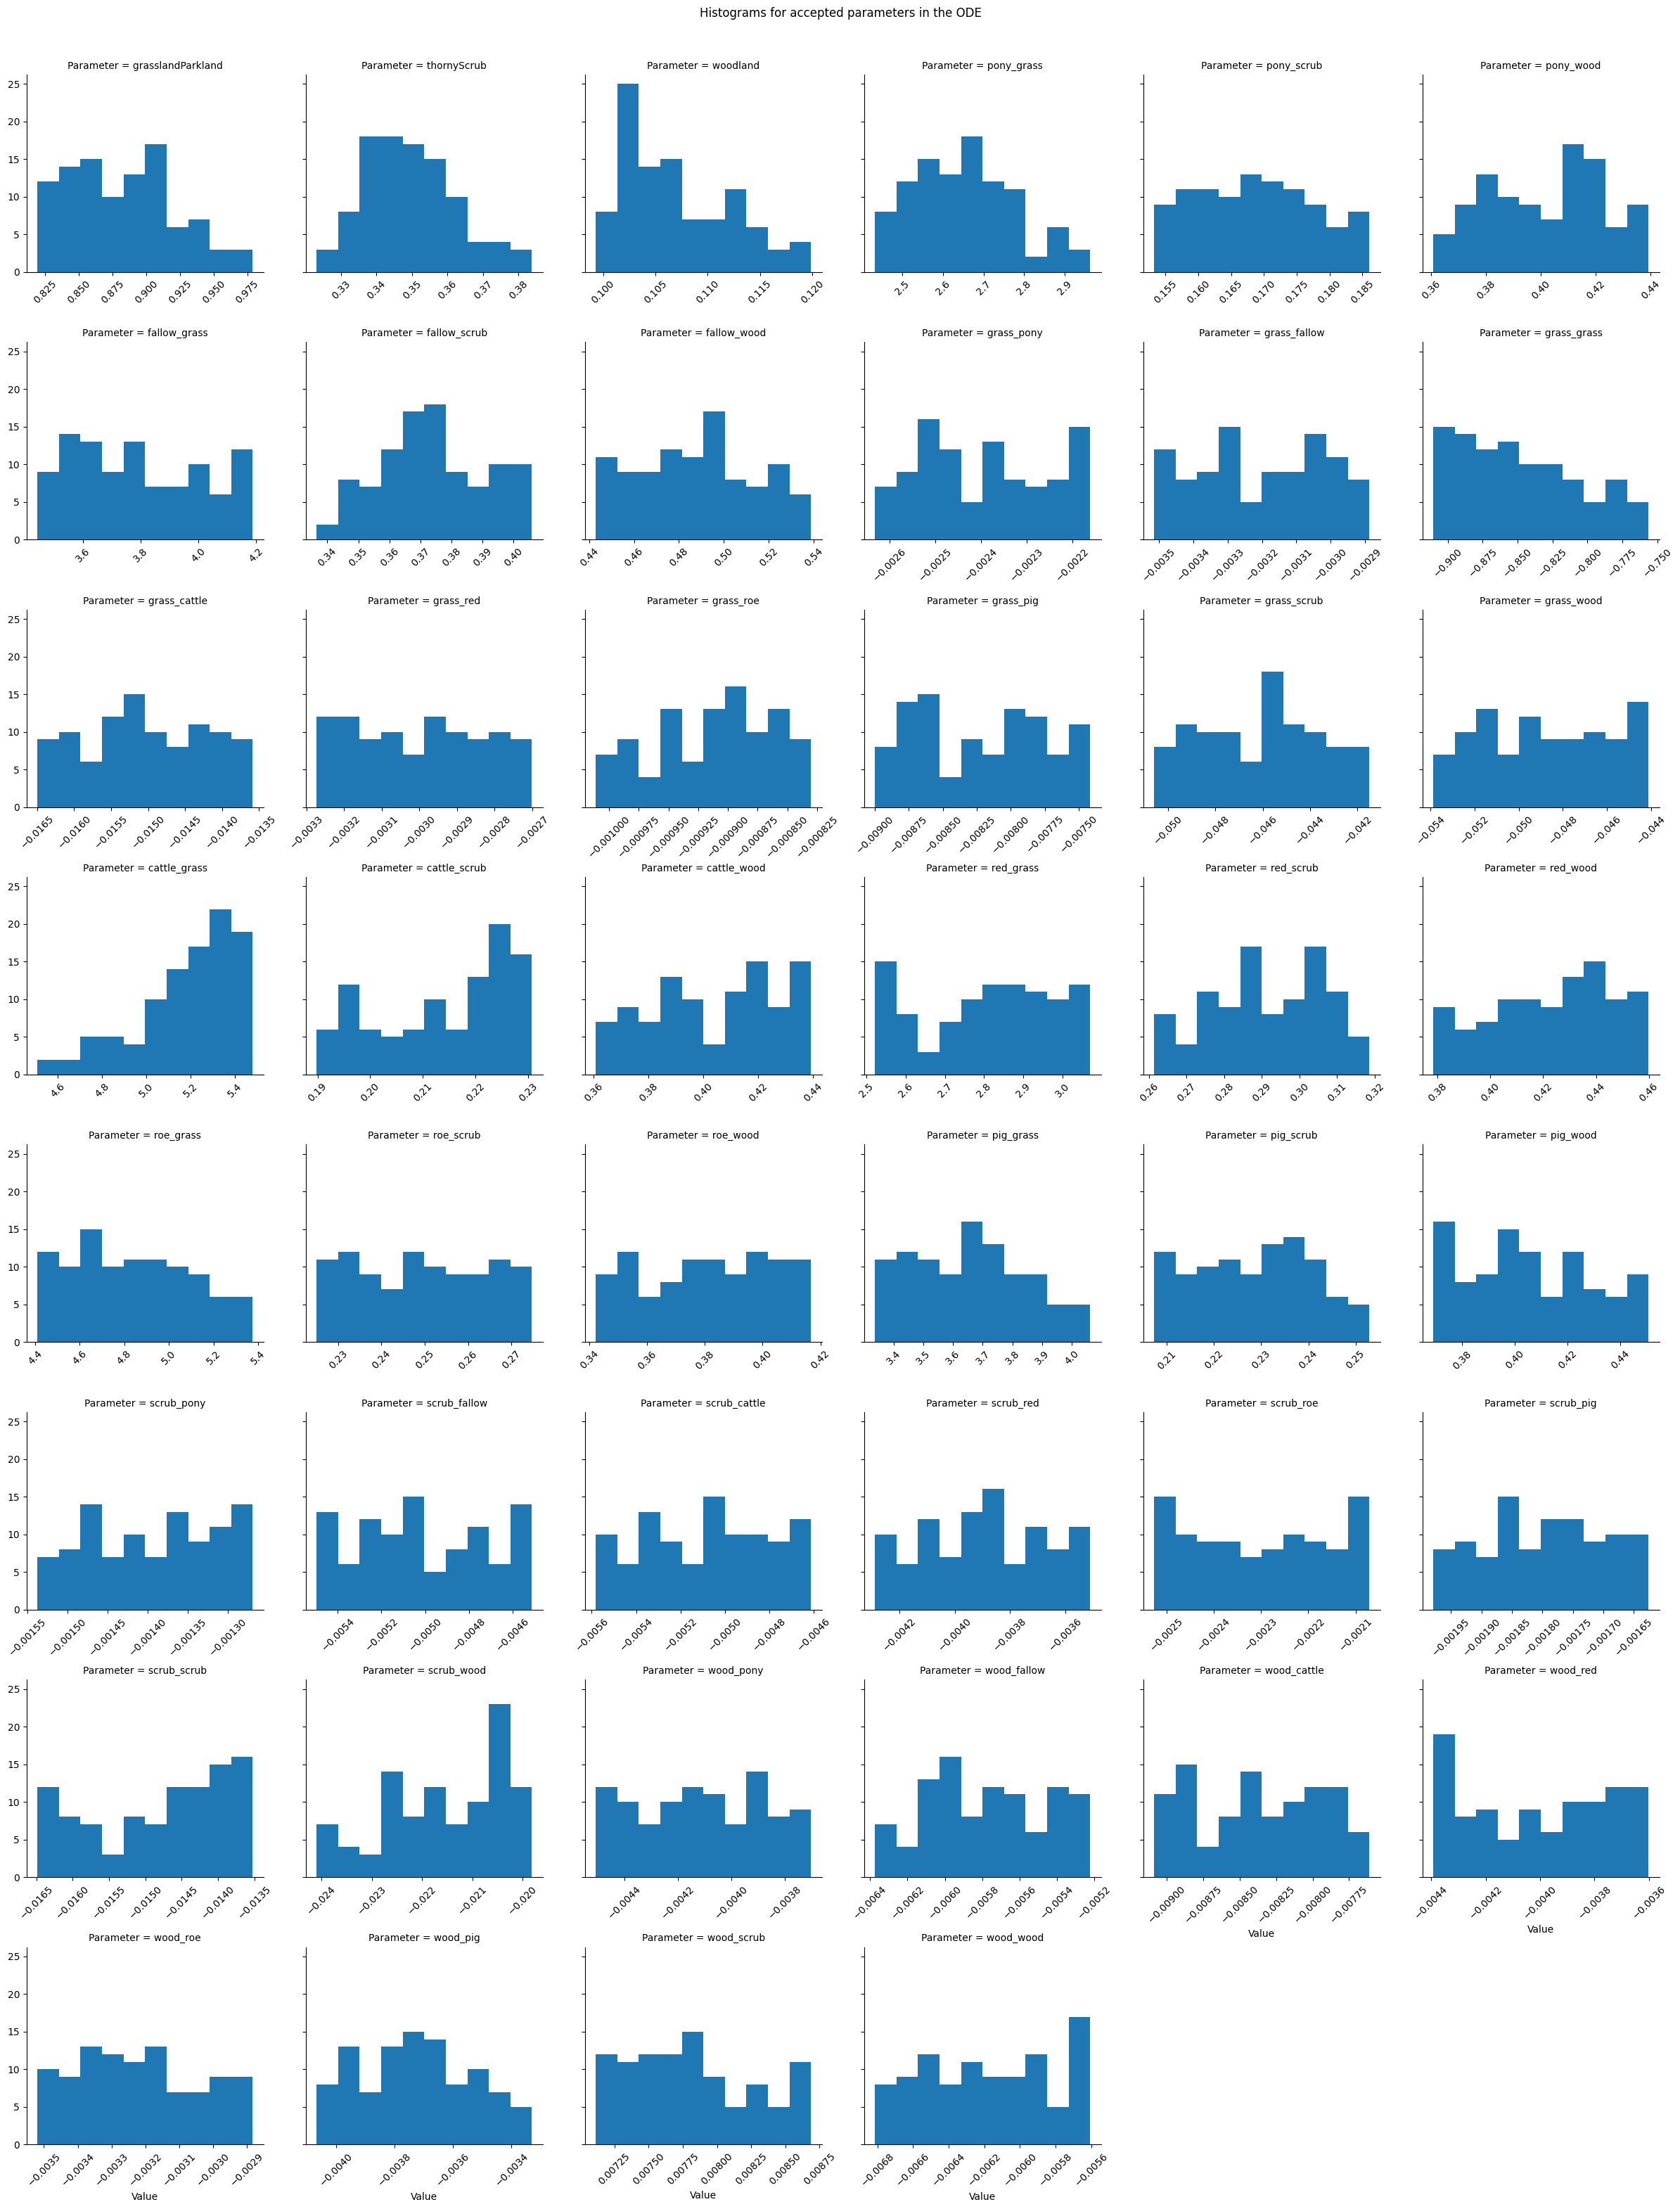

In [700]:
# Reshape the DataFrame into long format for histograms
df_long = parameters.melt(var_name='Parameter', value_name='Value')

# Create a FacetGrid of histograms
g = sns.FacetGrid(df_long, col='Parameter', col_wrap=6, height=4, sharex=False)

# Map a histogram plot to each subplot
g.map(plt.hist, 'Value')


# Rotate x-axis tick labels
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)

# add title
g.fig.suptitle('Histograms for accepted parameters in the ODE')

# Adjust the spacing between subplots
g.fig.tight_layout()

# Increase the top margin to prevent suptitle overlap
g.fig.subplots_adjust(top=0.95)

# Show the plot
plt.show()


## Landscape graph

In [4]:
# open the file
df = pd.read_csv('resilience_landscape_eem.csv').drop(['Unnamed: 0'], axis=1)

In [4]:
df = pd.read_csv('resilience_landscape_eem_current.csv').drop(['Unnamed: 0'], axis=1)

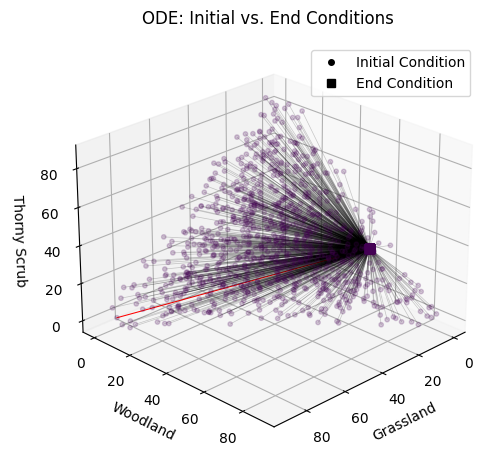

In [7]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],c=df['Stocking Density'], cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# Add legend for initial and end conditions
legend_handles = [plt.Line2D([], [], color='black', marker=initial_marker, linestyle='None', markersize=4, label='Initial Condition'),
                                             plt.Line2D([], [], color='black', marker=end_marker, linestyle='None', markersize=6, label='End Condition')]

ax.legend(handles=legend_handles, loc=[0.9,1])

cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE: Initial vs. End Conditions')

plt.tight_layout()

# Show the plot
plt.show()

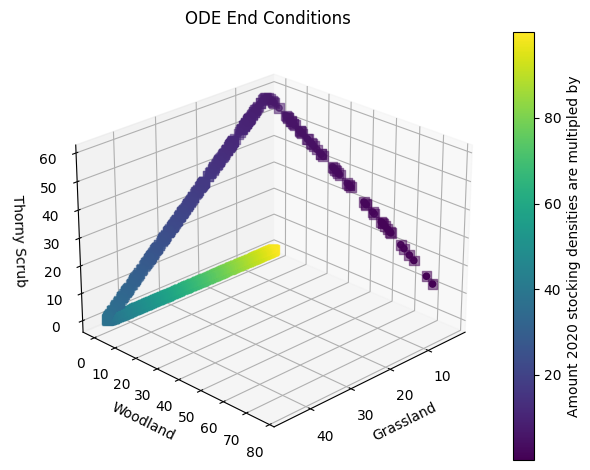

In [18]:
# now look at only end conditions and add labels 
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


cbar = plt.colorbar(ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  c=df['Stocking Density'], cmap=cm.viridis))
cbar.set_label('Amount 2020 stocking densities are multipled by')


# rotate view
ax.view_init(25, 45)

plt.title('ODE End Conditions')

plt.tight_layout()

# Show the plot
plt.show()


# Now graph all accepted params in ODE

In [3]:
# open the file
df = pd.read_csv('resilience_landscape_eem_allParams.csv').drop(['Unnamed: 0'], axis=1)

In [15]:
print("max",df["Grassland End"].max())
print("max",df["Grassland End"].min())

max 24.268014519675564
max 6.464066619686839e-05


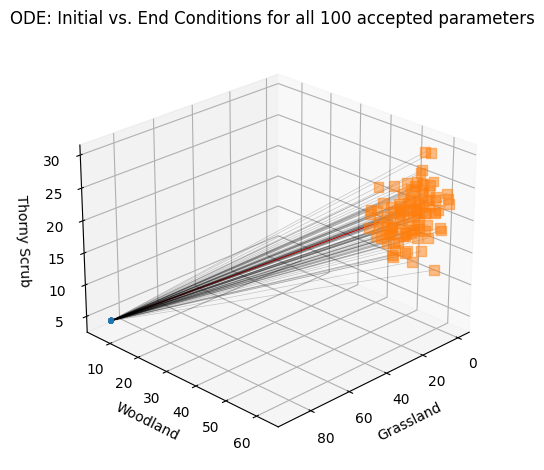

In [10]:
# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define marker shapes for initial and end conditions
initial_marker = 'o'
end_marker = 's'

# Scatter plot for initial conditions
initial_scatter = ax.scatter(df['Grassland Initial'], df['Woodland Initial'], df['Thorny Scrub Initial'],cmap=cm.viridis,  marker=initial_marker, s=10, alpha=0.2)

# Scatter plot for end conditions
end_scatter = ax.scatter(df['Grassland End'], df['Woodland End'], df['Thorny Scrub End'],  cmap=cm.viridis, marker=end_marker, s=50, alpha=0.5)


# Connect points with lines - plot the "true" run as red:
for i in range(len(df)):
    if df['Run Number'][i] == 1:  # Selecting run number 1
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='red', linewidth=0.75)
    else:
        ax.plot([df['Grassland Initial'][i], df['Grassland End'][i]],
                [df['Woodland Initial'][i], df['Woodland End'][i]],
                [df['Thorny Scrub Initial'][i], df['Thorny Scrub End'][i]], c='black', linewidth=0.5, alpha=0.2)

# Set labels
ax.set_xlabel('Grassland')
ax.set_ylabel('Woodland')
ax.set_zlabel('Thorny Scrub')


# rotate view
ax.view_init(25, 45)

plt.title('ODE: Initial vs. End Conditions for all 100 accepted parameters')

plt.tight_layout()

# Show the plot
plt.show()

## Look at growth experiment

In [50]:
# now let's look at experiments
final_df = pd.read_csv('experiment_growth.csv').drop(['Unnamed: 0'], axis=1)

FileNotFoundError: [Errno 2] No such file or directory: 'experiment_growth.csv'

In [244]:
    f = sns.FacetGrid(final_df, col="Ecosystem Element", palette='Set1', col_wrap=3, sharey = False)
    # graph abundance
    f.map_dataframe(sns.lineplot, 'Time', 'Abundance', hue="Growth Rate Change", style="Duration")
    f.add_legend(loc='lower right')

    for ax in f.axes.flat:
        ax.set_ylabel('Abundance')
        ax.set_xlabel('Time (Months)')
        ax.set_xticks([0, 50, 195, 350, 500])
        ax.set_xticklabels([0, 50, "195*", 350, 500])   

    # add subplot titles
    axes = f.axes.flatten()
    # fill between the quantiles
    axes[0].set_title("Roe deer")
    axes[1].set_title("Grassland")
    axes[2].set_title("Woodland")
    axes[3].set_title("Thorny Scrub")
    axes[4].set_title("Bare ground")
        
    # add titles etc.
    f.fig.suptitle('Experiment: Vegetation Perturbations of Various Magnitudes and Durations')
    plt.tight_layout()
    # plt.savefig('forecasting_experiment.png')
    plt.show()

NameError: name 'final_df' is not defined

## Time-series trajectory

In [340]:
df_ts = pd.read_csv('timeseries_eem.csv').drop(['Unnamed: 0'], axis=1)

In [341]:
# Randomly select 25 run_numbers
selected_run_numbers = df_ts['run_number'].sample(n=25)

# Filter the DataFrame based on the selected run_numbers
filtered_df = df_ts[df_ts['run_number'].isin(selected_run_numbers)]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


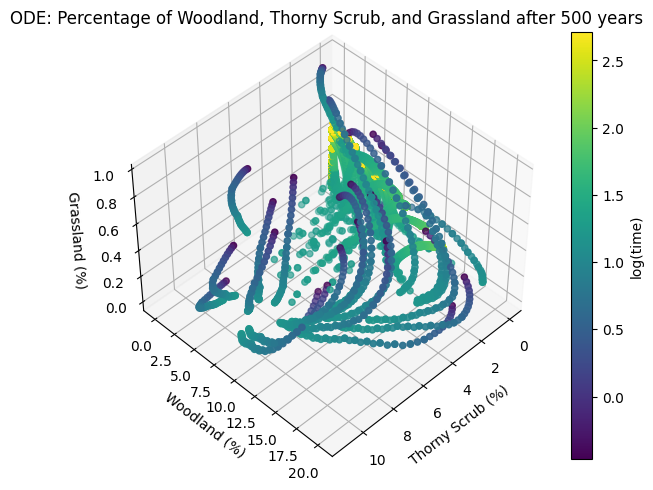

In [342]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract data from DataFrame
x = filtered_df['woodland']
y = filtered_df['thornyScrub']
z = filtered_df['grasslandParkland']
time = np.log10(filtered_df['time']) 

# Plot the 3D graph
ax.scatter(x, y, z, c=time, cmap=cm.viridis, s=0.1, alpha=0.01)

# Set labels and title
ax.set_xlabel('Thorny Scrub (%)')
ax.set_ylabel('Woodland (%)')
ax.set_zlabel('Grassland (%)')
ax.set_title('ODE: Percentage of Woodland, Thorny Scrub, and Grassland after 500 years')

# Add colorbar
cbar = plt.colorbar(ax.scatter(x, y, z, c=time, cmap=cm.viridis))
cbar.set_label('log(time)')


ax.view_init(elev=45, azim=45)

plt.tight_layout()

# Display the plot
plt.show()

# now look at tipping points: ODE

In [466]:
df_tipping = pd.read_csv('timeseries_tippingpoints_eem.csv').drop(['Unnamed: 0'], axis=1)
df_tipping["grasslandParkland"] = df_tipping["grasslandParkland"] * 89.9
df_tipping["thornyScrub"] = df_tipping["thornyScrub"] * 4.3
df_tipping["woodland"] = df_tipping["woodland"] * 5.8
df_tipping["roeDeer"] = df_tipping["roeDeer"] * 12

# adjust df for graphing
melted_df_tipping = df_tipping.melt(id_vars=['time', 'run_number', 'stocking'],
                                   value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                   var_name='Variable', value_name='Value')

In [467]:
# zoom up to 515
melted_df_tipping = melted_df_tipping.loc[melted_df_tipping["time"] >= 400]

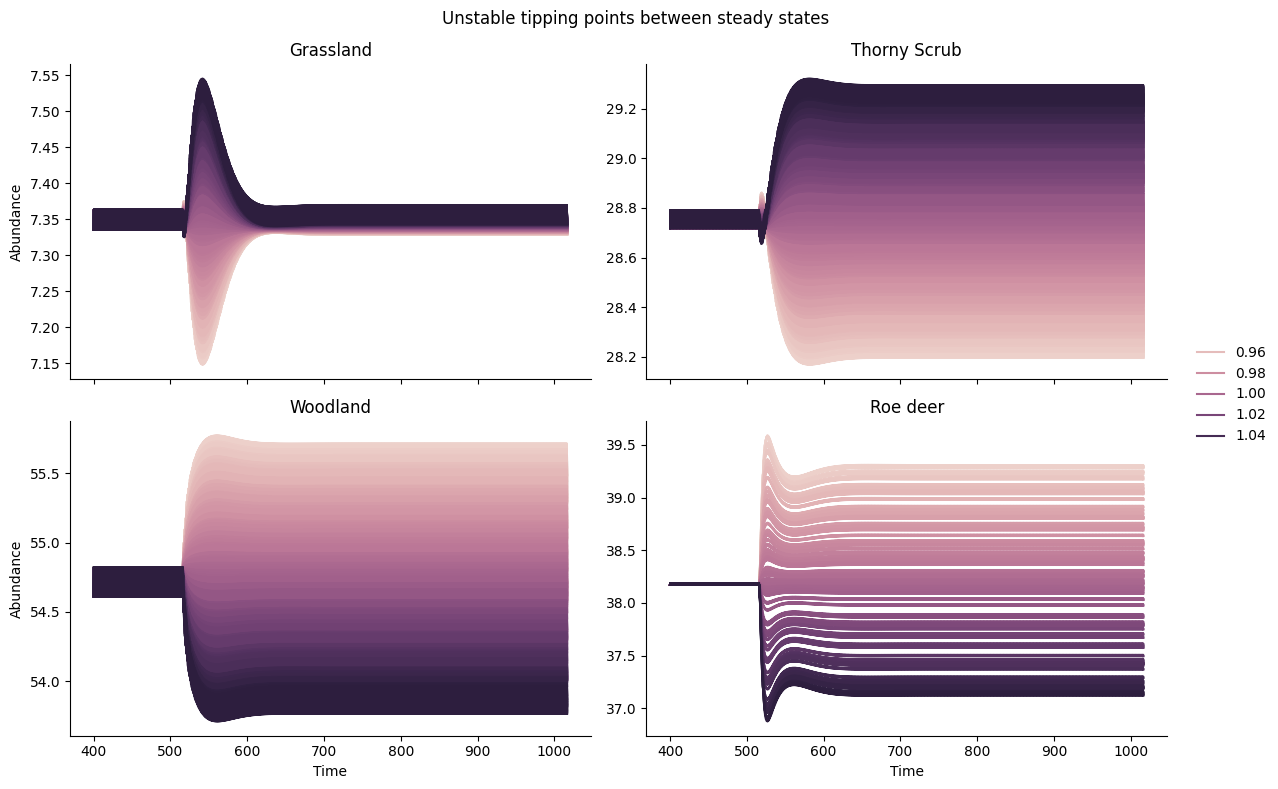

In [468]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(melted_df_tipping, col='Variable', col_wrap=2, height=4, aspect=1.5, sharey=False)

# Plot lineplot for each variable
g.map_dataframe(sns.lineplot, x='time', y='Value', hue='stocking', estimator=None)

# Set axis labels
g.set_axis_labels('Time', 'Abundance')

# Set title for each subplot
titles = ['Grassland', 'Thorny Scrub', 'Woodland', 'Roe deer']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# add legend
g.add_legend()

plt.suptitle('Unstable tipping points between steady states')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

# GA outputs for ODE landscape

In [9]:
# df1 = pd.read_csv('eem_ga_timeseries_stockingchanges.csv').drop(['Unnamed: 0'], axis=1) # varying one at a time
# df2 = pd.read_csv('eem_ga_timeseries_stockingchanges_alltogether.csv').drop(['Unnamed: 0'], axis=1) # varying all together
# df3 = pd.read_csv('eem_ga_timeseries_stockingchanges_nocontrol.csv').drop(['Unnamed: 0'], axis=1) # removing controls
# df4 = pd.read_csv('eem_ga_timeseries_stockingchanges_currentdynamics.csv').drop(['Unnamed: 0'], axis=1) # removing controls

# ga_landscape = pd.concat([df1, df2, df3, df4])


# # turn veg into percentages / number of individuals for interpretation on graph
# ga_landscape["exmoorPony"] = ga_landscape["exmoorPony"] * 23
# ga_landscape["fallowDeer"] = ga_landscape["fallowDeer"] * 42
# ga_landscape["longhornCattle"] = ga_landscape["longhornCattle"] * 53
# ga_landscape["redDeer"] = ga_landscape["redDeer"] * 13
# ga_landscape["tamworthPig"] = ga_landscape["tamworthPig"] * 20
# ga_landscape["grasslandParkland"] = ga_landscape["grasslandParkland"] * 89.9
# ga_landscape["thornyScrub"] = ga_landscape["thornyScrub"] * 4.3
# ga_landscape["woodland"] = ga_landscape["woodland"] * 5.8
# ga_landscape["roeDeer"] = ga_landscape["roeDeer"] * 12

# # rename columns
# ga_landscape = ga_landscape.rename(columns={"Species": "Experiment"})
# ga_landscape['Experiment'] = ga_landscape['Experiment'].str.replace('exmoorPony', 'Vary ponies')
# ga_landscape['Experiment'] = ga_landscape['Experiment'].str.replace('fallowDeer', 'Vary fallow deer')
# ga_landscape['Experiment'] = ga_landscape['Experiment'].str.replace('longhornCattle', 'Vary cattle')
# ga_landscape['Experiment'] = ga_landscape['Experiment'].str.replace('redDeer', 'Vary red deer')
# ga_landscape['Experiment'] = ga_landscape['Experiment'].str.replace('tamworthPig', 'Vary pigs')

In [60]:
df1 = pd.read_csv('eem_ga_timeseries_stockingchanges_alltogether_aes1.csv').drop(['Unnamed: 0'], axis=1) # varying all together, end state 1
df2 = pd.read_csv('eem_ga_timeseries_stockingchanges_alltogether_aes2.csv').drop(['Unnamed: 0'], axis=1) # varying all together, end state 2
df3 = pd.read_csv('eem_ga_timeseries_stockingchanges_alltogether_aes3.csv').drop(['Unnamed: 0'], axis=1) # varying all together, end state 3
df4 = pd.read_csv('eem_ga_timeseries_stockingchanges_nocontrol.csv').drop(['Unnamed: 0'], axis=1) # removing controls
df5 = pd.read_csv('eem_ga_timeseries_stockingchanges_currentdynamics.csv').drop(['Unnamed: 0'], axis=1) # current dynamics

ga_landscape = pd.concat([df1, df2, df3, df4, df5])


# turn veg into percentages / number of individuals for interpretation on graph
ga_landscape["exmoorPony"] = ga_landscape["exmoorPony"] * 23
ga_landscape["fallowDeer"] = ga_landscape["fallowDeer"] * 42
ga_landscape["longhornCattle"] = ga_landscape["longhornCattle"] * 53
ga_landscape["redDeer"] = ga_landscape["redDeer"] * 13
ga_landscape["tamworthPig"] = ga_landscape["tamworthPig"] * 20
ga_landscape["grasslandParkland"] = ga_landscape["grasslandParkland"] * 89.9
ga_landscape["thornyScrub"] = ga_landscape["thornyScrub"] * 4.3
ga_landscape["woodland"] = ga_landscape["woodland"] * 5.8
ga_landscape["roeDeer"] = ga_landscape["roeDeer"] * 12

ga_landscape = ga_landscape.rename(columns={"Species": "Experiment"})


In [61]:
# adjust df for graphing
melted_df_ga = ga_landscape.melt(id_vars=['Time', 'run_number', 'Stocking', 'Experiment'],
                                #    value_vars=['grasslandParkland', 'thornyScrub', 'woodland', 'roeDeer'],
                                    value_vars=['exmoorPony','fallowDeer','grasslandParkland','longhornCattle','redDeer','roeDeer','tamworthPig','thornyScrub','woodland'],
                                   var_name='Variable', value_name='Value')


In [62]:
end = melted_df_ga.loc[melted_df_ga["Time"] == 516]

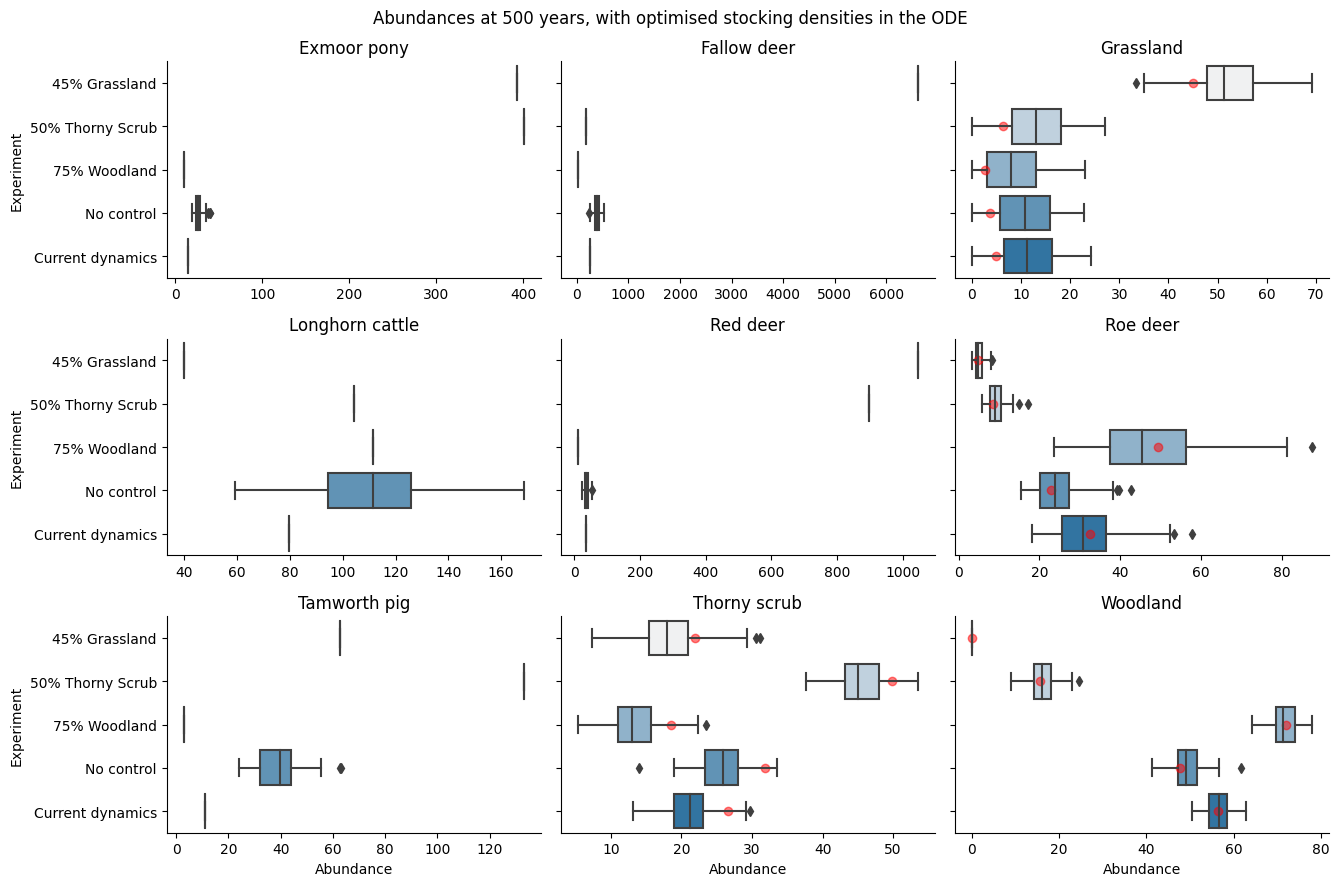

In [94]:
# Create a FacetGrid with subplots
g = sns.FacetGrid(end, col='Variable', col_wrap=3, height=3, aspect=1.5, sharey=True, sharex=False)

# Plot lineplot for each variable
g.map_dataframe(sns.boxplot, x='Value', y='Experiment', hue='Experiment', dodge=False)

# Set axis labels
g.set_axis_labels('Abundance')

# Specify the locations for the red dots for each subplot

# Set title for each subplot
titles = ['Exmoor pony','Fallow deer','Grassland','Longhorn cattle','Red deer','Roe deer','Tamworth pig','Thorny scrub','Woodland']

red_dot_locations = {
    'grasslandParkland': {
        'Exp 1': {'x': [0.5*89.9], 'y': [0]},
        'Exp 2': {'x': [0.07*89.9], 'y': [1]}, 
        'Exp 3': {'x': [0.03*89.9], 'y': [2]},
        'Exp 4': {'x': [0.042*89.9], 'y': [3]},
        'Exp 5': {'x': [0.055*89.9], 'y': [4]}

    },
    'roeDeer': {
        'Exp 1': {'x': [0.4*12], 'y': [0]},
        'Exp 2': {'x': [0.7*12], 'y': [1]}, 
        'Exp 3': {'x': [4.1*12], 'y': [2]},
        'Exp 4': {'x': [1.9*12], 'y': [3]},
        'Exp 5': {'x': [2.7*12], 'y': [4]}
            }, 
    'thornyScrub': {
        'Exp 1': {'x': [5.1*4.3], 'y': [0]},
        'Exp 2': {'x': [11.6*4.3], 'y': [1]}, 
        'Exp 3': {'x': [4.3*4.3], 'y': [2]},
        'Exp 4': {'x': [7.4*4.3], 'y': [3]},
        'Exp 5': {'x': [6.2*4.3], 'y': [4]}
            }, 
    'woodland': {
        'Exp 1': {'x': [0*5.8], 'y': [0]},
        'Exp 2': {'x': [2.7*5.8], 'y': [1]}, 
        'Exp 3': {'x': [12.4*5.8], 'y': [2]},
        'Exp 4': {'x': [8.2*5.8], 'y': [3]},
        'Exp 5': {'x': [9.7*5.8], 'y': [4]}
            },        
}


# Iterate over each facet and add red dots at the specified locations
for ax, variable, title in zip(g.axes.flat, end['Variable'].unique(), titles):
    ax.set_title(title)
    locations = red_dot_locations.get(variable, {})
    for experiment, locs in locations.items():
        ax.scatter(locs['x'], locs['y'], color='red', alpha=0.5)

plt.suptitle('Abundances at 500 years, with optimised stocking densities in the ODE')
# Adjust spacing between subplots
g.tight_layout()

# Display the plot
plt.show()

In [68]:
melted_df_ga

,Time,run_number,Stocking,Experiment,Variable,Value
0,0.000000,1,0,45% Grassland,exmoorPony,0.000000
1,0.340909,1,0,45% Grassland,exmoorPony,0.000000
2,0.681818,1,0,45% Grassland,exmoorPony,0.000000
3,1.022727,1,0,45% Grassland,exmoorPony,0.000000
4,1.363636,1,0,45% Grassland,exmoorPony,0.000000
...,...,...,...,...,...,...
6965995,515.375000,100,0,Current dynamics,woodland,58.708362
6965996,515.750000,100,0,Current dynamics,woodland,58.527788
6965997,516.000000,100,0,Current dynamics,woodland,58.527788
6965998,516.375000,100,0,Current dynamics,woodland,58.708362


In [80]:
grouped_df = melted_df_ga.groupby(['Time', 'Variable', 'Experiment'])['Value'].agg(median=np.median, percentile_95th=lambda x: np.percentile(x, 95), percentile_5th=lambda x: np.percentile(x, 5)).reset_index()

In [82]:
list = ["roeDeer", "grasslandParkland", "thornyScrub", "woodland"]
grouped_df = grouped_df[grouped_df['Variable'].isin(list)]


In [83]:
grouped_df

,Time,Variable,Experiment,median,percentile_95th,percentile_5th
10,0.00,grasslandParkland,45% Grassland,89.900000,89.900000,89.900000
11,0.00,grasslandParkland,50% Thorny Scrub,89.900000,89.900000,89.900000
12,0.00,grasslandParkland,75% Woodland,89.900000,89.900000,89.900000
13,0.00,grasslandParkland,Current dynamics,89.900000,89.900000,89.900000
14,0.00,grasslandParkland,No control,89.900000,89.900000,89.900000
...,...,...,...,...,...,...
69655,516.75,woodland,45% Grassland,0.000000,0.000000,0.000000
69656,516.75,woodland,50% Thorny Scrub,16.010719,20.279025,11.790506
69657,516.75,woodland,75% Woodland,71.357476,76.424295,66.540837
69658,516.75,woodland,Current dynamics,56.562587,61.882521,52.024392


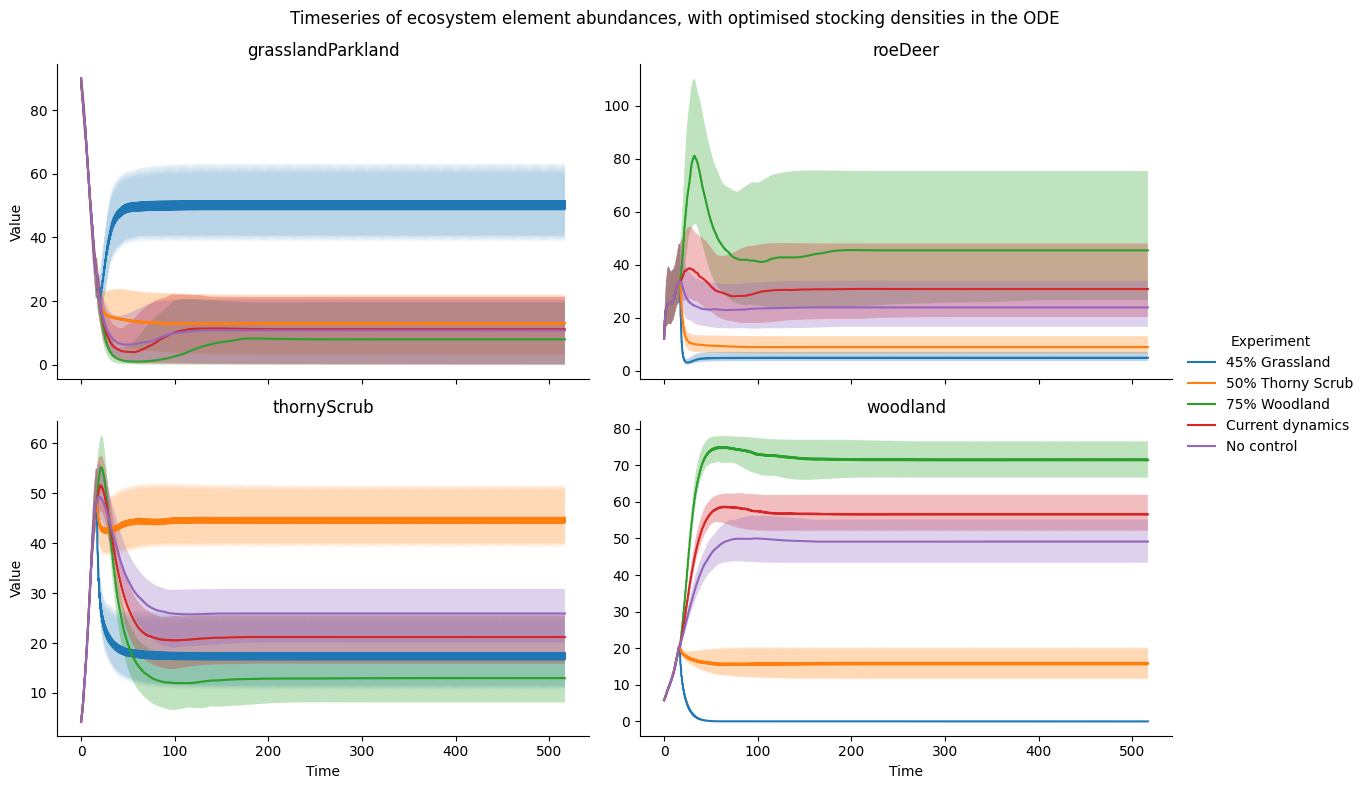

In [93]:
# now look at timeseries
g = sns.FacetGrid(grouped_df, col="Variable", hue = "Experiment", col_wrap=2, height=4, aspect=1.5, sharey=False)

# Map a lineplot to each subplot
g.map(sns.lineplot, "Time", "median")

# Map fill_between for each subplot
for facetgrid, ax in enumerate(g.axes.flat):
    facet_data = grouped_df[grouped_df["Variable"] == g.col_names[facetgrid]]
    for exp, exp_data in facet_data.groupby("Experiment"):
        ax.fill_between(exp_data["Time"], exp_data["percentile_5th"], exp_data["percentile_95th"], alpha=0.3)


# Set the x-axis and y-axis labels
g.set_axis_labels("Time", "Value")

# Set the title for each subplot
titles = grouped_df["Variable"].unique()
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

plt.suptitle('Timeseries of ecosystem element abundances, with optimised stocking densities in the ODE')
# Adjust spacing between subplots
g.tight_layout()

# Add a legend to the plot
g.add_legend(title="Experiment")


# Show the plot
plt.show()